In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import sys
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

This dataset is from Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019. This dataset consists several key parameter of graduate admission. Dataset 2 is collected from https://github.com/deedy/gradcafe_data/blob/master/college_agg_phd.csv.  Dataset 2 contains 130 different universities with specific undergraduate GPA, and GRE score. By Visualizing two dataset, it is clear that standariezd score are highly related to acceptance rate, and dataset 2 shows the accpetance rate for univeristies which has more than 3000 applicants. In this dataset analysis, there are 3 main sections. First part is data Visualization; second part is merge of two datasets, and third part is a simple machine learning process based on Multivariate Linear Regression.

EM0212 Applied Data Science: Datasheet for Data Set “Graduate Admission

Abstract:
Selected Data is published on Kaggle by Mohan S Acharya. Currenelty, author didnt Clarify the source the data, but the dataset was inspired by UCLA graduate admission according to Acharya. This data set was used to predict chance of acceptance of graduate programs. This dataset contains several different parameters which were used for considerations. Such parameters include GRE scores, TOFEL scores, rating of undergraduate institution, letter of recommendation, undergraduate GPA, and chance of admission. This dataset was built to help perspective applicants to assess the probability of acceptance. In addition, other researchers used this data set to evaluate the importance of standardized score, and the importance of each parameter during graduate admission.

Motivation for dataset creation:
• Why this dataset was created?
This dataset was created to evaluate the importance of each admission parameters that was stated above. Perspective applicants also used this data to assess the chance of acceptance.
• What other tasks could the dataset be used for?
Other institution can use this dataset to evaluate the student profiles for different institutions and adjust the parameters for graduate applications.
• Has the dataset been used for any task already ？
This dataset was used frequently on admission analysis by various researchers.
https://www.kaggle.com/hidede/graduate-admissions
https://www.kaggle.com/nitindatta/graduate-admissions
https://www.kaggle.com/venky73/admission-chances
Dataset Composition：
• What are the instances?
This dataset contains numerical result only, and there are several parameters, and parameters include: GRE scores, TOFEL scores, rating of undergraduate institution, letter of recommendation, undergraduate GPA, and chance of admission.
• What data does each instance consist of？
Each parameter in this dataset is consisted by numerical numbers, and some parameters are defined in scale rather than actual raw data, such as strength of recommendation, and rate of undergraduate institution.
Data Collection Process:
• How was the data collected?
Original source of this dataset did not specify the process of collections. Since this dataset was provided by UCLA graduate admission, the dataset may be part of applicant’s profiles.
• Over what time-frame was the data collected?
This dataset was posted in December 2018, but the source didn’t mark the specific time interval for data collection.
• How was the data associated with each instance acquired?
Each parameter collected was required application material for graduate program. In addition, each parameter was used to evaluate different aspects of applicants, such as standardized score was used to test the academic ability of applicants, research experience was used to determine the research ability of applicants.
• Does this data contain all possible instances?
This dataset covers most criteria of graduate admission, and each parameter was quantified to evaluate the strength of each parameter. However, I believe that strength of resume, and other achievements should be included, since some applicants may have great achievement that was not in the parameter.
• If the dataset is a sample, then what is the population?
This dataset contained 500 different applicants’ profiles, and this number is relatively large for graduate admission.
Data Preprocessing
• What preprocessing was done?
Analysis of this dataset was conducted by various researcher, I am excerpting information from Dede, a student who previous conducted thorough research on this dataset. In Dede’s analysis, she preprocessed simply by identify the extreme value for each parameter, and she classified each parameter with different frame, for example she listed the applicants who have research experience and who do not have experience, and she listed the distribution of each standardize score for further evaluation.
• Was the raw data saved in addition to preprocessed data?
Yes, Dede saved the raw data to compare her selected data for final result.
• Is the preprocessing software available?
Yes, Dede used Python to process the raw data, and visualized the data for general classification.
• Does this dataset collection procedure achieve the motivation fort creating the dataset started in the first section of this datasheet?
Yes. Dede’s purpose was to use this dataset to evaluate the importance of each parameter, and she preprocess the data for better visualization for each parameter.
• Other comments:
After visualizing each parameter, Dede conducted regression algorithms, classification algorithm, and clustering algorithms for further evaluation.
Data Maintenance
• Will the dataset be updated?
No, this dataset is not updated by original source.
• Is there a repository to link all papers that used this dataset?
https://www.kaggle.com/mohansacharya/graduate-admissions/kernels
Dataset Distribution:
• How is the dataset distributed?
This dataset is publicly posted on Kaggle.
• When will the dataset be released?
There is specific data of release
Legal and Ethical Considerations
• If the dataset relates to people, were they informed about the data collection？
This source of dataset did not mention if the data was collected with individual’s consent.
• If it relates to people were there any ethical review applications?

No, since the name of individual applicant is confidential, so all applicants are anonymous in this dataset.
• Reference:
GRADUATE ADMISSIONS | Kaggle. (n.d.). Retrieved March 11, 2019, from https://www.kaggle.com/hidede/graduate-admissions

In [2]:
df = pd.read_csv("Admission_Predict_1.csv")
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


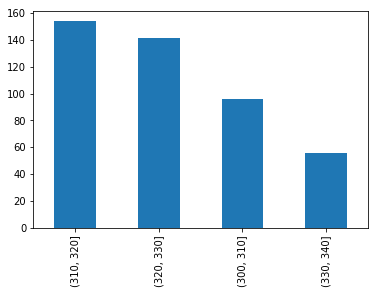

In [3]:
bins = [300,310,320,330,340]
a = pd.cut(df["GRE Score"], bins = bins)
a.value_counts().plot(kind = "bar")

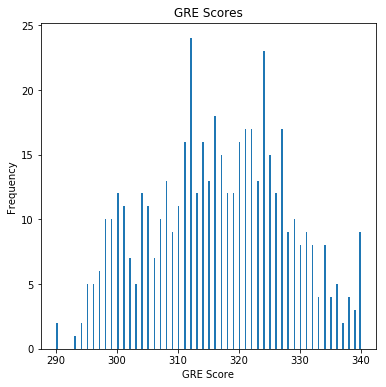

In [4]:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

In [5]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

From here we can see there is no missing slot from the dataset

In [7]:
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


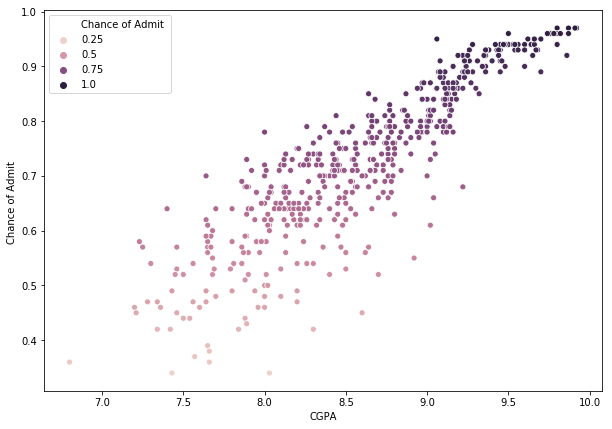

In [8]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['CGPA'],df['Chance of Admit '],hue=df['Chance of Admit '])


From here we can see the higher the undergraduate GPA, the higher chance the acceptance chance will be

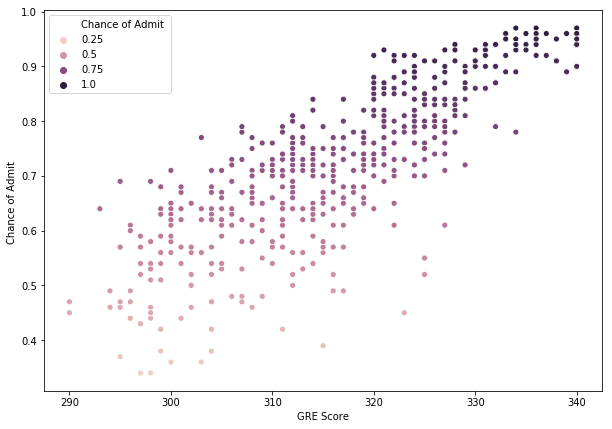

In [9]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['GRE Score'],df['Chance of Admit '],hue=df['Chance of Admit '])

From the visuliza graph, we can see that the higher the GRE score is the higher the Admission chance will be. However, there are several data point that diverges from the main trend, but the overall trends indicated the Correlations between GRE score and admission chance 

Overall trends indicates that the higher the TOFEL score the higher chance will be. However, comnpared to GRE and undergradute GPA, TOFEL is obviously less related with chance of admission. More data visualizations required to find out more detailed realationship betweem TOFEL and admission chance 

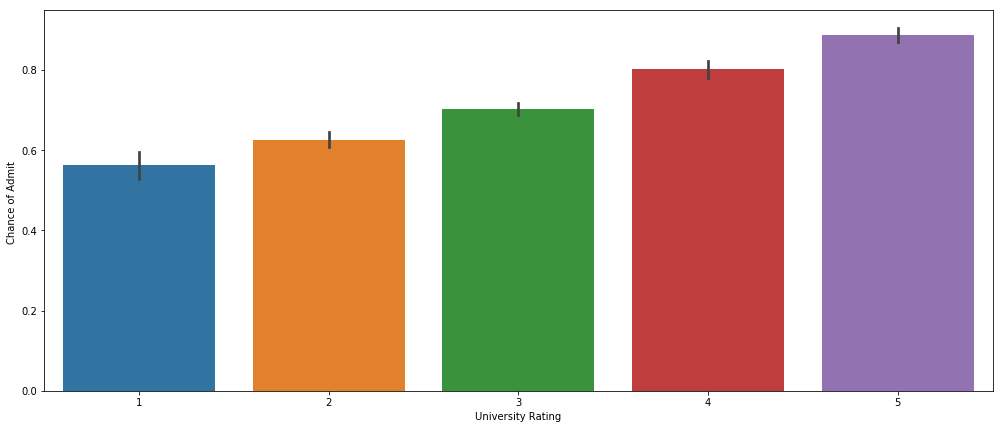

In [10]:
plt.figure(figsize=(17,7))
sns.barplot(df['University Rating'],df['Chance of Admit '])

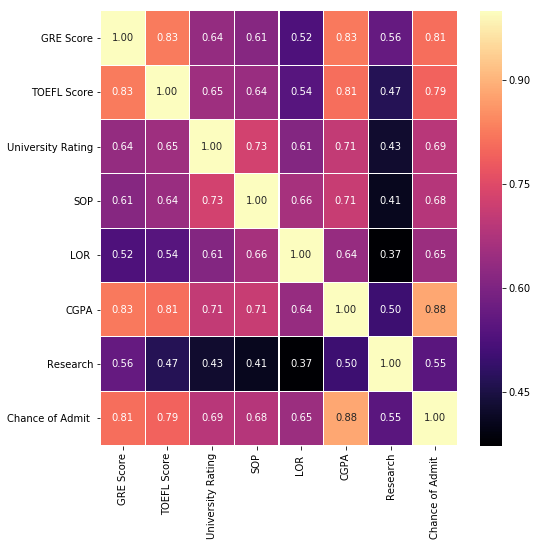

In [11]:
fig,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

From this heat map, it is clearly that the chance of admit is highly related to GRE, TOFEL and Undergraduate GPA, and UGPA is the most influential factor among all parameter

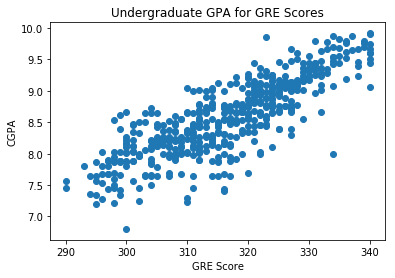

In [12]:
plt.scatter(df["GRE Score"],df.CGPA)
plt.title("Undergraduate GPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

From this plot, it is obvious that students who got higher GRE score also had higher undergraduate GPA

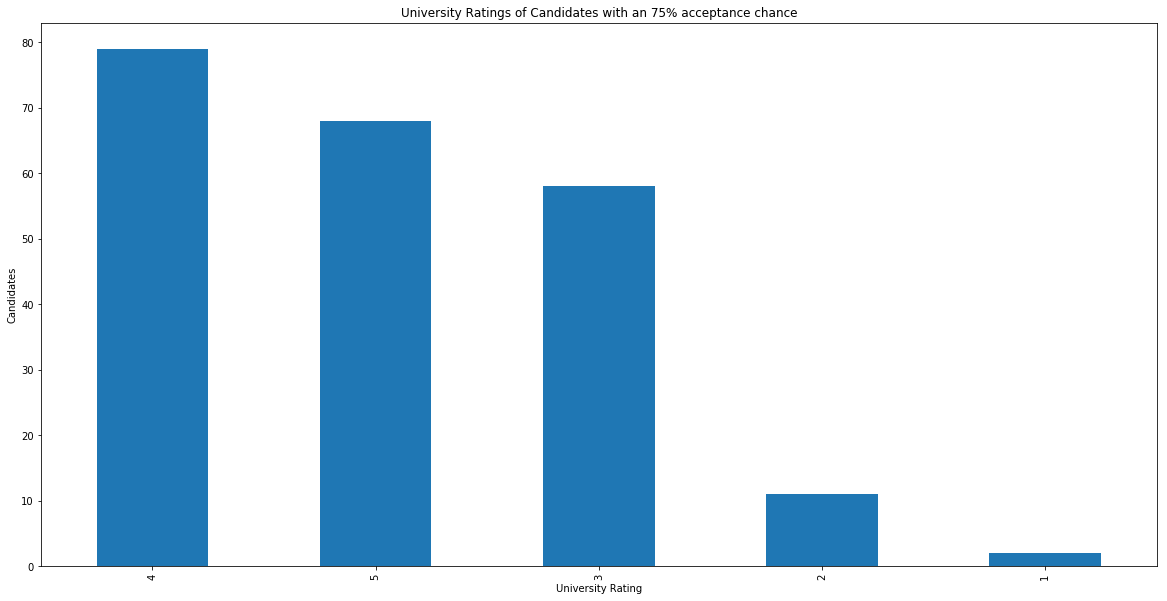

In [13]:
s = df[df["Chance of Admit "] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()


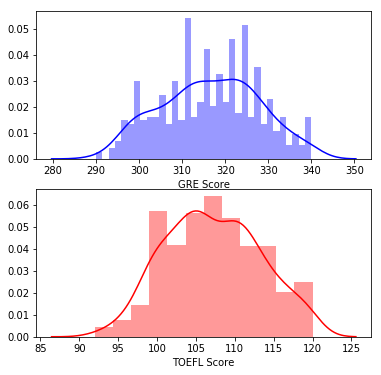

In [14]:
plt.figure(figsize=(6,6))
plt.subplot(2, 1, 1)
sns.distplot(df['GRE Score'],bins=34,color='blue')
plt.subplot(2, 1, 2)
sns.distplot(df['TOEFL Score'],bins=12,color='red')

From this two plots, we can see that most applicants tend to achieve 310 and above for GRE, and 100 and above for TOFEL

In [15]:
toppers=df[(df['GRE Score']>=320) & (df['TOEFL Score']>=110) & (df['CGPA']>=9.5)].sort_values(by=['Chance of Admit '],ascending=False)
toppers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
202,340,120,5,4.5,4.5,9.91,1,0.97
24,336,119,5,4.0,3.5,9.80,1,0.97
203,334,120,5,4.0,5.0,9.87,1,0.97
143,340,120,4,4.5,4.0,9.92,1,0.97
385,335,117,5,5.0,5.0,9.82,1,0.96
384,340,113,4,5.0,5.0,9.74,1,0.96
71,336,112,5,5.0,5.0,9.76,1,0.96
81,340,120,4,5.0,5.0,9.50,1,0.96
130,339,114,5,4.0,4.5,9.76,1,0.96
148,339,116,4,4.0,3.5,9.80,1,0.96


In [16]:
toppers=df[(df['GRE Score']>=320) & (df['TOEFL Score']>=110) & (df['CGPA']>=9.5)].sort_values(by=['Chance of Admit '],ascending=False)
toppers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
202,340,120,5,4.5,4.5,9.91,1,0.97
24,336,119,5,4.0,3.5,9.80,1,0.97
203,334,120,5,4.0,5.0,9.87,1,0.97
143,340,120,4,4.5,4.0,9.92,1,0.97
385,335,117,5,5.0,5.0,9.82,1,0.96
384,340,113,4,5.0,5.0,9.74,1,0.96
71,336,112,5,5.0,5.0,9.76,1,0.96
81,340,120,4,5.0,5.0,9.50,1,0.96
130,339,114,5,4.0,4.5,9.76,1,0.96
148,339,116,4,4.0,3.5,9.80,1,0.96


I take out the applicants who got higher than 320 in GRE, and higher than 110 in TOFEL, and all selected applicants have more than 89% chance to be admitted, and this proved that the higher the standardized score the higher chance of admission.

Above plots indicate the distribution for all parameter for this dataset.

Here is the second data which contained 130 univeristies with the more detialed distribution on standrized score 

From this two plots, we can see that most applicants tend to achieve 310 and above for GRE, and 100 and above for TOFEL

In [17]:
df2 = pd.read_csv("Dataset2.1.csv")


In [18]:
df2.head(10)

,University Name,Number Of Reportees,Number Of Acceptances And Rejections Reported,Acceptance Rate,Number Reporting GRE and GPA,Undergraduate GPA (25 percentile),Undergraduate GPA 50 percentile),Undergraduate GPA (75 percentile),GRE Verbal (25th Percentile),GRE Verbal (50th Percentile),GRE Verbal (75th Percentile),GRE Quant (25th Percentile),GRE Quant (50th Percentile),GRE Quant (75th Percentile)
0,Stanford University,6666,5860,0.240785,1002,3.8000,3.900,3.9850,159.00,164.0,168.00,164.00,168.0,170.0
1,"University Of California, Berkeley (UCB)",5875,5272,0.274848,692,3.8000,3.900,3.9600,160.00,164.0,168.00,163.25,166.0,169.0
2,Columbia University,5605,4480,0.292857,631,3.7200,3.850,3.9300,159.00,164.0,168.00,161.75,166.0,169.0
3,"University Of Michigan, Ann Arbor (UMich)",5595,4509,0.353737,826,3.6825,3.830,3.9400,158.00,162.0,166.00,161.00,165.0,168.0
4,Cornell University,5550,4669,0.332619,772,3.7050,3.870,3.9500,157.50,163.0,167.00,161.00,165.0,169.0
5,"University Of California, Los Angeles (UCLA)",5000,4229,0.428707,666,3.6400,3.800,3.9200,157.00,162.0,167.00,161.00,165.0,168.0
6,University Of Chicago (UChicago),4787,3981,0.306456,627,3.7300,3.865,3.9600,161.00,165.0,168.00,162.00,166.0,170.0
7,University Of Pennsylvania (UPenn),4704,3722,0.278076,523,3.7000,3.860,3.9500,159.00,163.0,167.00,161.00,166.0,169.0
8,"University Of Washington, Seattle (UW)",4644,3871,0.372514,855,3.6650,3.810,3.9400,158.00,163.0,166.00,160.00,164.0,168.0
9,Harvard University,4431,3771,0.285070,406,3.7175,3.850,3.9525,162.75,166.0,168.25,163.00,167.0,170.0


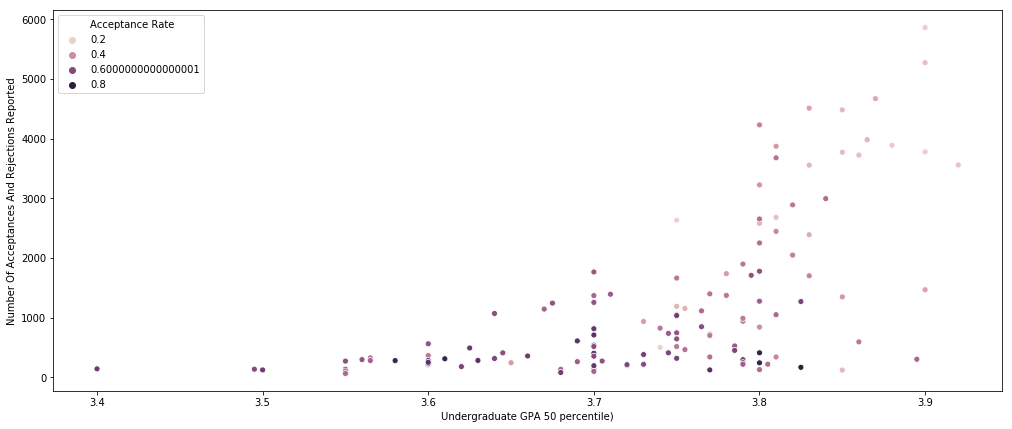

In [19]:
plt.figure(figsize=(17,7))
sns.scatterplot(df2['Undergraduate GPA 50 percentile)'],df2['Number Of Acceptances And Rejections Reported'],hue=df2['Acceptance Rate'])

From this scatter plot we can see that the higher the number of applicants the higher undergraduate GPA will be, and such results indicates that universities which has high applicants are generally more competitive and has higher median UGPA 

In [20]:
toppers=df2[(df2['Undergraduate GPA 50 percentile)']>=3.7) & (df2['GRE Verbal (50th Percentile)']>=160) & (df2['GRE Quant (50th Percentile)']>=160) & (df2['Number Of Acceptances And Rejections Reported']>=2000)].sort_values(by=['Acceptance Rate'],ascending=True)
toppers

,University Name,Number Of Reportees,Number Of Acceptances And Rejections Reported,Acceptance Rate,Number Reporting GRE and GPA,Undergraduate GPA (25 percentile),Undergraduate GPA 50 percentile),Undergraduate GPA (75 percentile),GRE Verbal (25th Percentile),GRE Verbal (50th Percentile),GRE Verbal (75th Percentile),GRE Quant (25th Percentile),GRE Quant (50th Percentile),GRE Quant (75th Percentile)
23,Brown University,3080,2632,0.234422,311,3.6000,3.750,3.9050,157.00,163.0,166.00,161.00,166.0,168.0
0,Stanford University,6666,5860,0.240785,1002,3.8000,3.900,3.9850,159.00,164.0,168.00,164.00,168.0,170.0
10,Yale University,4351,3776,0.246557,390,3.7225,3.900,3.9700,158.00,164.0,167.00,161.00,165.0,169.0
12,Princeton University,4298,3887,0.251865,480,3.7350,3.880,3.9600,160.00,164.0,168.00,163.00,167.0,169.0
14,Massachusetts Institute Of Technology (MIT),4140,3557,0.267641,457,3.8125,3.920,3.9875,160.00,164.0,167.00,164.00,168.0,170.0
21,Duke University,3352,2679,0.273983,383,3.6000,3.810,3.9400,158.00,162.0,167.00,163.00,166.0,169.0
1,"University Of California, Berkeley (UCB)",5875,5272,0.274848,692,3.8000,3.900,3.9600,160.00,164.0,168.00,163.25,166.0,169.0
7,University Of Pennsylvania (UPenn),4704,3722,0.278076,523,3.7000,3.860,3.9500,159.00,163.0,167.00,161.00,166.0,169.0
9,Harvard University,4431,3771,0.285070,406,3.7175,3.850,3.9525,162.75,166.0,168.25,163.00,167.0,170.0
2,Columbia University,5605,4480,0.292857,631,3.7200,3.850,3.9300,159.00,164.0,168.00,161.75,166.0,169.0


Here are universities which has more than 2000 applicants, and the data is arranged from lower accpetance rate to higher acceptance rate. Therefore, it is obvious that the lower the accpetance is the higher other parameter such as GRE score and GPA are higher.

In [21]:
df3 = df2.drop(["Number Of Reportees","Number Of Acceptances And Rejections Reported","Number Reporting GRE and GPA","Undergraduate GPA (25 percentile)","Undergraduate GPA (75 percentile)","GRE Verbal (25th Percentile)","GRE Verbal (75th Percentile)","GRE Quant (25th Percentile)","GRE Quant (75th Percentile)"],axis=1)

In [22]:
df3['GRE Score'] = df3['GRE Verbal (50th Percentile)']+df3['GRE Quant (50th Percentile)']

In [23]:
df3

,University Name,Acceptance Rate,Undergraduate GPA 50 percentile),GRE Verbal (50th Percentile),GRE Quant (50th Percentile),GRE Score
0,Stanford University,0.240785,3.900,164.0,168.0,332.0
1,"University Of California, Berkeley (UCB)",0.274848,3.900,164.0,166.0,330.0
2,Columbia University,0.292857,3.850,164.0,166.0,330.0
3,"University Of Michigan, Ann Arbor (UMich)",0.353737,3.830,162.0,165.0,327.0
4,Cornell University,0.332619,3.870,163.0,165.0,328.0
5,"University Of California, Los Angeles (UCLA)",0.428707,3.800,162.0,165.0,327.0
6,University Of Chicago (UChicago),0.306456,3.865,165.0,166.0,331.0
7,University Of Pennsylvania (UPenn),0.278076,3.860,163.0,166.0,329.0
8,"University Of Washington, Seattle (UW)",0.372514,3.810,163.0,164.0,327.0
9,Harvard University,0.285070,3.850,166.0,167.0,333.0


In [24]:
t = df3["GRE Score"].mean()

In [25]:
q = df3["Undergraduate GPA 50 percentile)"].mean()

In [26]:
list = []
for i in range (0,500):
    list.append(323)

In [27]:
df["Median Gre Score for 140 Univeristies"] = list

In [28]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Median Gre Score for 140 Univeristies
0,337,118,4,4.5,4.5,9.65,1,0.92,323
1,324,107,4,4.0,4.5,8.87,1,0.76,323
2,316,104,3,3.0,3.5,8.00,1,0.72,323
3,322,110,3,3.5,2.5,8.67,1,0.80,323
4,314,103,2,2.0,3.0,8.21,0,0.65,323


In [29]:
df["difference"] = df['GRE Score'] - df['Median Gre Score for 140 Univeristies']

In [30]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Median Gre Score for 140 Univeristies,difference
0,337,118,4,4.5,4.5,9.65,1,0.92,323,14
1,324,107,4,4.0,4.5,8.87,1,0.76,323,1
2,316,104,3,3.0,3.5,8.00,1,0.72,323,-7
3,322,110,3,3.5,2.5,8.67,1,0.80,323,-1
4,314,103,2,2.0,3.0,8.21,0,0.65,323,-9


In [31]:
list2 = []
for i in range (0,500):
    if (df.iloc[i,9]) >= 0:
        list2.append("pos")
    else:
        list2.append("neg")

df["score comparision"] = list2

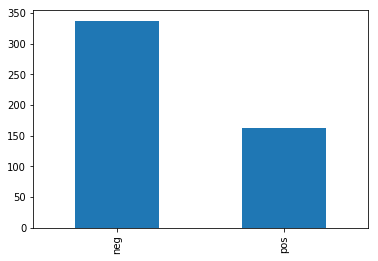

In [32]:
df['score comparision'].value_counts().plot(kind = 'bar')

From here we can see, only 150 of 500 sample in dataset1 passed the average median GRE score for Dataset2

In [33]:
df7 = df2.drop(["Number Of Reportees","GRE Quant (50th Percentile)","Number Of Acceptances And Rejections Reported","Number Reporting GRE and GPA","Undergraduate GPA (25 percentile)","Undergraduate GPA (75 percentile)","GRE Verbal (25th Percentile)","GRE Verbal (75th Percentile)","GRE Quant (25th Percentile)","GRE Quant (75th Percentile)","GRE Verbal (50th Percentile)"],axis=1)

In [34]:
df7

,University Name,Acceptance Rate,Undergraduate GPA 50 percentile)
0,Stanford University,0.240785,3.900
1,"University Of California, Berkeley (UCB)",0.274848,3.900
2,Columbia University,0.292857,3.850
3,"University Of Michigan, Ann Arbor (UMich)",0.353737,3.830
4,Cornell University,0.332619,3.870
5,"University Of California, Los Angeles (UCLA)",0.428707,3.800
6,University Of Chicago (UChicago),0.306456,3.865
7,University Of Pennsylvania (UPenn),0.278076,3.860
8,"University Of Washington, Seattle (UW)",0.372514,3.810
9,Harvard University,0.285070,3.850


here is some cleaning to take out the useful parameter

In [35]:
list = []
for i in range (0,500):
    list.append(9.35)

In [36]:
df["Undergraduate GPA 50 percentile)"] = list

In [37]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Median Gre Score for 140 Univeristies,difference,score comparision,Undergraduate GPA 50 percentile)
0,337,118,4,4.5,4.5,9.65,1,0.92,323,14,pos,9.35
1,324,107,4,4.0,4.5,8.87,1,0.76,323,1,pos,9.35
2,316,104,3,3.0,3.5,8.00,1,0.72,323,-7,neg,9.35
3,322,110,3,3.5,2.5,8.67,1,0.80,323,-1,neg,9.35
4,314,103,2,2.0,3.0,8.21,0,0.65,323,-9,neg,9.35


Here I merged two dataset together, since the dataset1 is individual information and dataset2 is a average number for a group of individuals, so I take the average of the median for GRE score for 138 univeristies and compared the individual in dataset1 with the average median.

In [38]:
df["difference"] = df['CGPA'] - df['Undergraduate GPA 50 percentile)']

In [39]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Median Gre Score for 140 Univeristies,difference,score comparision,Undergraduate GPA 50 percentile)
0,337,118,4,4.5,4.5,9.65,1,0.92,323,0.30,pos,9.35
1,324,107,4,4.0,4.5,8.87,1,0.76,323,-0.48,pos,9.35
2,316,104,3,3.0,3.5,8.00,1,0.72,323,-1.35,neg,9.35
3,322,110,3,3.5,2.5,8.67,1,0.80,323,-0.68,neg,9.35
4,314,103,2,2.0,3.0,8.21,0,0.65,323,-1.14,neg,9.35


Here is a similiar merge which I took out the median GPA, and compared individual performance with average median of 138 univeristies. 

In [40]:
list2 = []
for i in range (0,500):
    if (df.iloc[i,9]) >= 0:
        list2.append("pos")
    else:
        list2.append("neg")

df["score comparision"] = list2

In [41]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Median Gre Score for 140 Univeristies,difference,score comparision,Undergraduate GPA 50 percentile)
0,337,118,4,4.5,4.5,9.65,1,0.92,323,0.30,pos,9.35
1,324,107,4,4.0,4.5,8.87,1,0.76,323,-0.48,neg,9.35
2,316,104,3,3.0,3.5,8.00,1,0.72,323,-1.35,neg,9.35
3,322,110,3,3.5,2.5,8.67,1,0.80,323,-0.68,neg,9.35
4,314,103,2,2.0,3.0,8.21,0,0.65,323,-1.14,neg,9.35


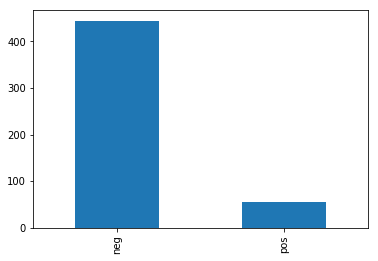

In [42]:
df['score comparision'].value_counts().plot(kind = 'bar')

In [72]:
df2 = pd.read_csv("Admission_Predict_1.csv")
df.head()



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Median Gre Score for 140 Univeristies,difference,score comparision,Undergraduate GPA 50 percentile)
0,337,118,4,4.5,4.5,9.65,1,0.92,323,0.30,pos,9.35
1,324,107,4,4.0,4.5,8.87,1,0.76,323,-0.48,neg,9.35
2,316,104,3,3.0,3.5,8.00,1,0.72,323,-1.35,neg,9.35
3,322,110,3,3.5,2.5,8.67,1,0.80,323,-0.68,neg,9.35
4,314,103,2,2.0,3.0,8.21,0,0.65,323,-1.14,neg,9.35


In [74]:
df2['University Rating'].unique()

array([4, 3, 2, 5, 1])

In [73]:
df2['Research'].unique()

array([1, 0])

In [75]:
def process_data(original_data):
    """
    Processes data for use in linear regression model
    """
    
    data = original_data.copy()
    

    data = pd.get_dummies(data,
                          columns = ['University Rating'],
                          drop_first = True)
    
    X = data.drop('Chance of Admit ', axis=1)
    y = data['Chance of Admit ']
    return X, y


In [78]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2)

In [79]:
import sklearn.linear_model as lm

model = lm.LinearRegression()

X_train, y_train = process_data(train)
X_test, y_test = process_data(test)

model.fit(X_train, y_train)

y_fitted = model.predict(X_train)
y_predicted = model.predict(X_test)

In [80]:
def rmse(predicted, actual):
   
    return np.sqrt(np.mean((predicted - actual) ** 2))

train_rmse = rmse(y_fitted, y_train)
test_rmse = rmse(y_predicted, y_test)

print("Training RMSE: {}\nTest RMSE: {}".format(train_rmse, test_rmse))

Training RMSE: 0.05906860143924694
Test RMSE: 0.05472232436675479


Here is the linear regression predictor of the chance of admission using the data set. This predictor will take in the values in all of the columns without chance of admit and predict the chance of admission for that student. The model will be build using the linear_model sublibrary of scikit-learn, a machine learning library in Python.

In order to test the accuracy of the model,the data is splited into a training set and testing set; then a function train_test_split was used. Finally the linear regression model is done by applying process_data function to each set of data fitting the model to training data and running predictor for both traning and testing data.

Finally the accuracy is determined by Root mean square error


